In [1]:
import pandas as pd
df = pd.read_csv('country_wise_latest.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [15]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [17]:
# Summary statistics for the dataset
df.describe()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [19]:
import numpy as np

# Replacing infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checking if the issue is resolved
df[['Deaths / 100 Recovered']].describe()


,Deaths / 100 Recovered
count,182.000000
mean,40.558297
std,336.669357
min,0.000000
25%,1.442500
50%,3.580000
75%,6.232500
max,3259.260000


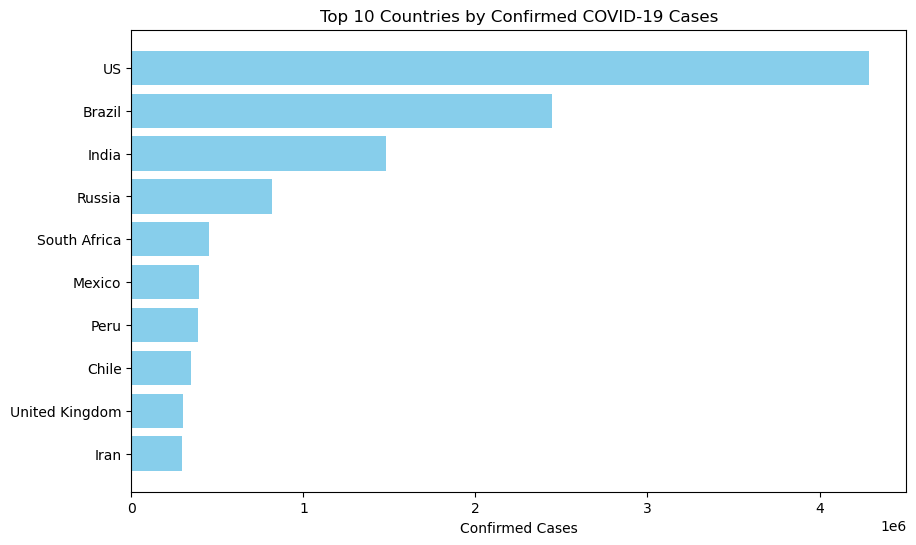

In [21]:
import matplotlib.pyplot as plt

# Top 10 countries by confirmed cases
top_countries = df.nlargest(10, 'Confirmed')

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_countries['Country/Region'], top_countries['Confirmed'], color='skyblue')
plt.xlabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.gca().invert_yaxis()  # Invert to have the largest at the top
plt.show()


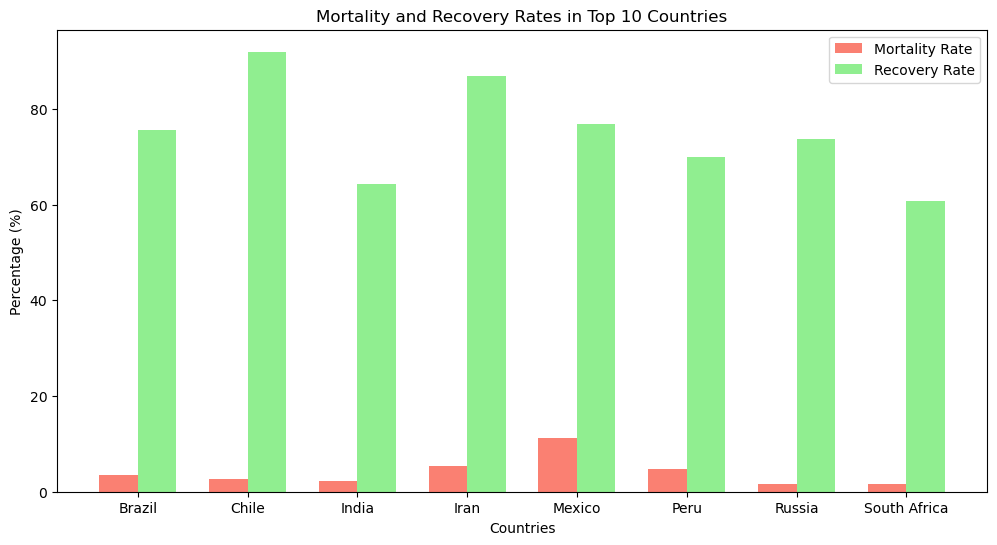

In [23]:
import numpy as np

# Data for the top 10 countries
top_countries = df[df['Country/Region'].isin(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 
                                              'Mexico', 'Peru', 'Chile', 'UK', 'Iran'])]

# Setting up the plot
labels = top_countries['Country/Region']
mortality_rate = top_countries['Deaths / 100 Cases']
recovery_rate = top_countries['Recovered / 100 Cases']

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, mortality_rate, width, label='Mortality Rate', color='salmon')
bars2 = ax.bar(x + width/2, recovery_rate, width, label='Recovery Rate', color='lightgreen')

# Adding labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Percentage (%)')
ax.set_title('Mortality and Recovery Rates in Top 10 Countries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.show()


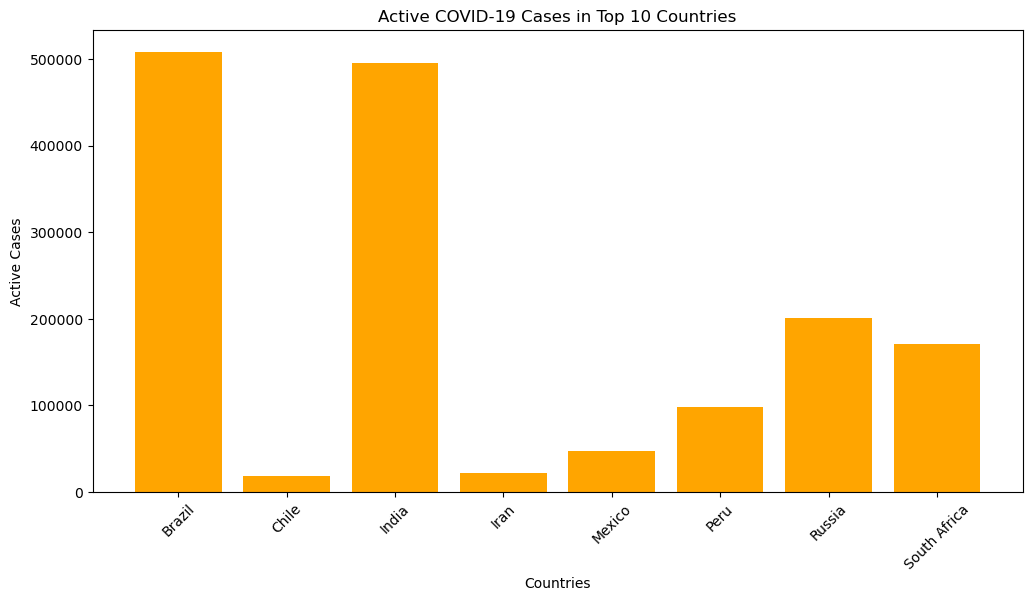

In [25]:
# Data for the top 10 countries by active cases
top_countries_active = df[df['Country/Region'].isin(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 
                                                     'Mexico', 'Peru', 'Chile', 'UK', 'Iran'])]

# Active cases data
active_cases = top_countries_active['Active']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_countries_active['Country/Region'], active_cases, color='orange')
plt.xlabel('Countries')
plt.ylabel('Active Cases')
plt.title('Active COVID-19 Cases in Top 10 Countries')
plt.xticks(rotation=45)
plt.show()


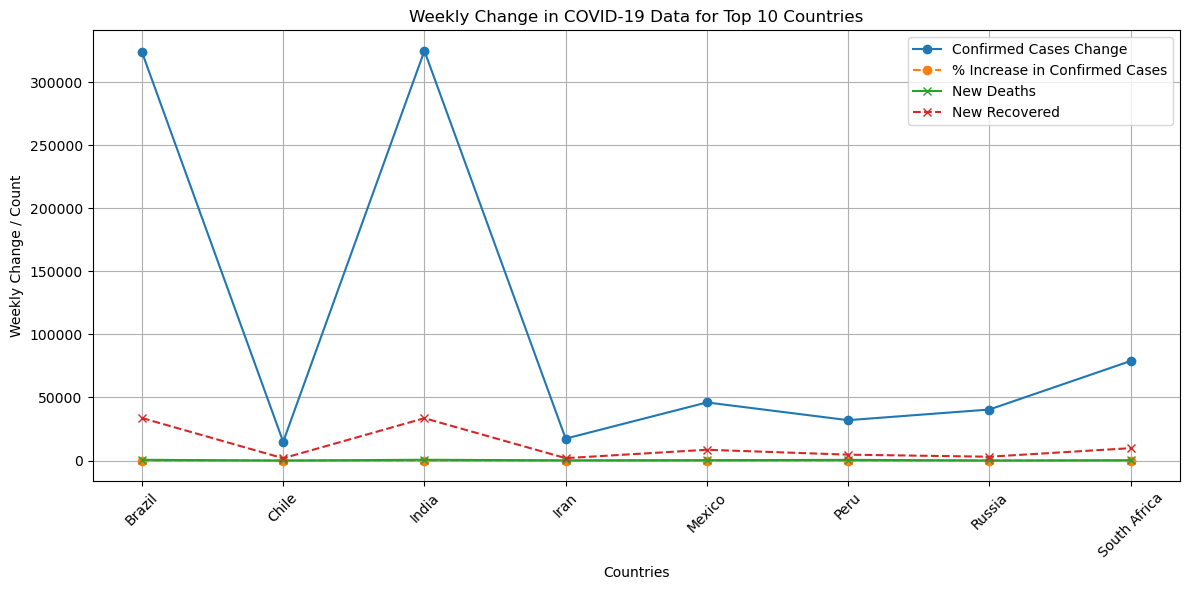

In [27]:
# Data for weekly change in confirmed cases, deaths, and recoveries
top_countries_weekly = df[df['Country/Region'].isin(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 
                                                     'Mexico', 'Peru', 'Chile', 'UK', 'Iran'])]

# Plotting the weekly change for confirmed cases, deaths, and recoveries
plt.figure(figsize=(12, 6))

# Weekly changes
plt.plot(top_countries_weekly['Country/Region'], top_countries_weekly['1 week change'], label='Confirmed Cases Change', marker='o')
plt.plot(top_countries_weekly['Country/Region'], top_countries_weekly['1 week % increase'], label='% Increase in Confirmed Cases', marker='o', linestyle='--')
plt.plot(top_countries_weekly['Country/Region'], top_countries_weekly['New deaths'], label='New Deaths', marker='x')
plt.plot(top_countries_weekly['Country/Region'], top_countries_weekly['New recovered'], label='New Recovered', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Weekly Change / Count')
plt.title('Weekly Change in COVID-19 Data for Top 10 Countries')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [31]:
# List of unique countries/regions in the dataset
print(df['Country/Region'].unique())


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

In [33]:
# Data for Pakistan
pakistan_data = df[df['Country/Region'] == 'Pakistan']

# Displaying the data for Pakistan
print(pakistan_data)


    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
128       Pakistan     274289    5842     241026   27421       1176   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
128          20           3592                2.13                  87.87   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
128                    2.42               266096           8193   

     1 week % increase             WHO Region  
128               3.08  Eastern Mediterranean  


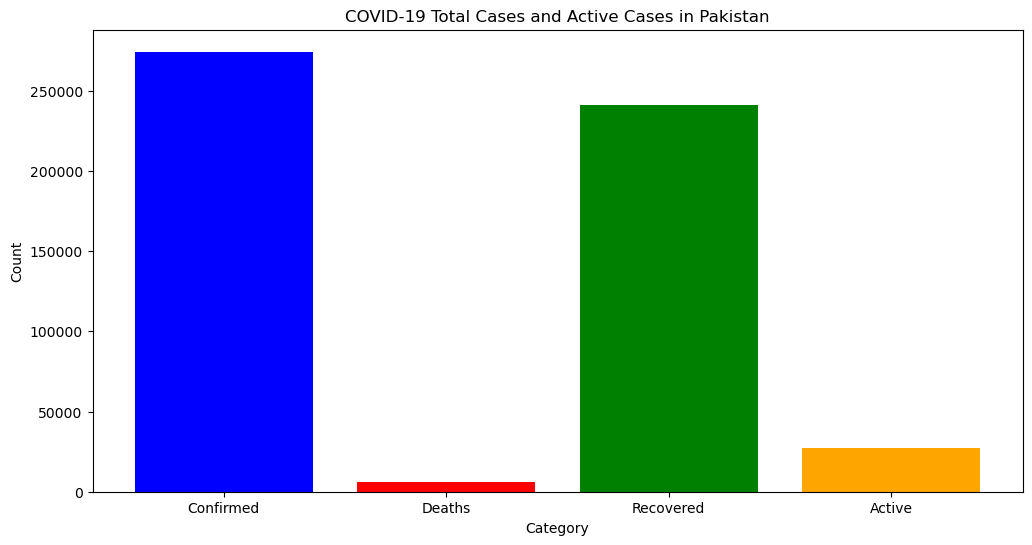

In [35]:
# Plotting Total Cases and Active Cases for Pakistan
plt.figure(figsize=(12, 6))
labels = ['Confirmed', 'Deaths', 'Recovered', 'Active']
values = [pakistan_data['Confirmed'].values[0], pakistan_data['Deaths'].values[0], 
          pakistan_data['Recovered'].values[0], pakistan_data['Active'].values[0]]

plt.bar(labels, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('COVID-19 Total Cases and Active Cases in Pakistan')
plt.show()


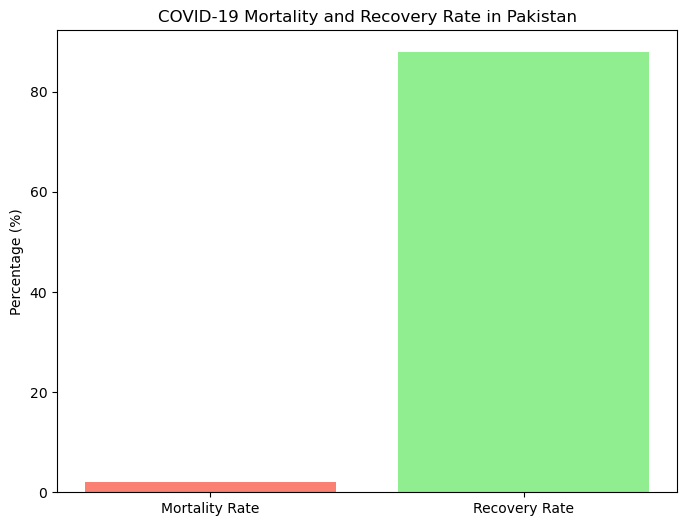

In [37]:
# Mortality and Recovery Rates for Pakistan
mortality_rate_pakistan = pakistan_data['Deaths / 100 Cases'].values[0]
recovery_rate_pakistan = pakistan_data['Recovered / 100 Cases'].values[0]

plt.figure(figsize=(8, 6))
plt.bar(['Mortality Rate', 'Recovery Rate'], [mortality_rate_pakistan, recovery_rate_pakistan], color=['salmon', 'lightgreen'])
plt.ylabel('Percentage (%)')
plt.title('COVID-19 Mortality and Recovery Rate in Pakistan')
plt.show()


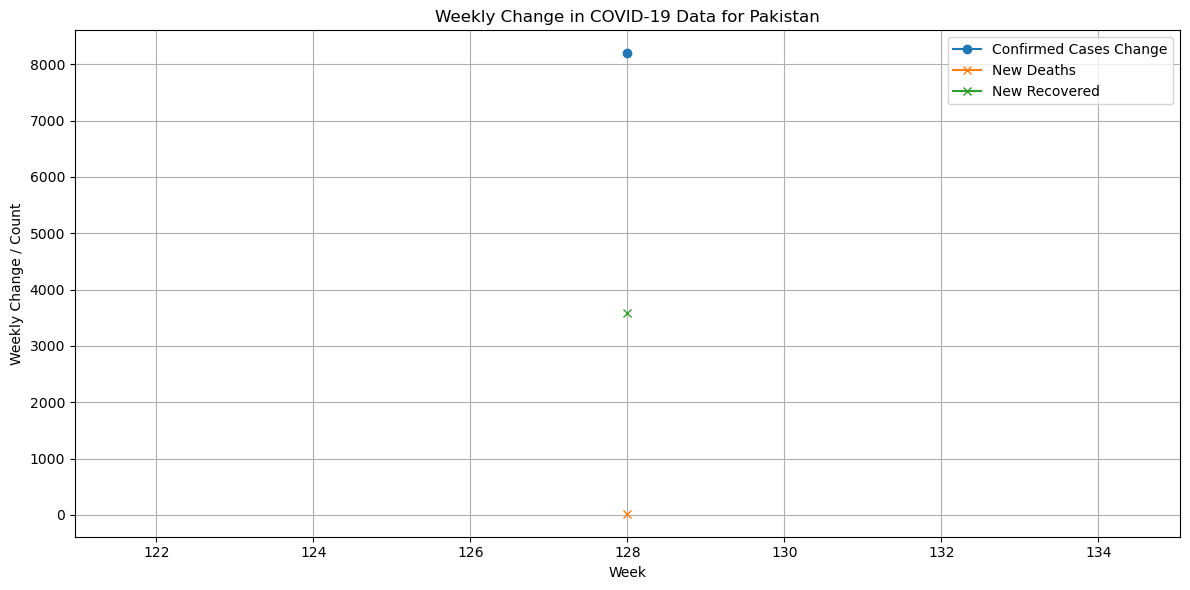

In [39]:
# Plotting Weekly Changes for Pakistan
plt.figure(figsize=(12, 6))
plt.plot(pakistan_data['1 week change'], label='Confirmed Cases Change', marker='o')
plt.plot(pakistan_data['New deaths'], label='New Deaths', marker='x')
plt.plot(pakistan_data['New recovered'], label='New Recovered', marker='x')

plt.xlabel('Week')
plt.ylabel('Weekly Change / Count')
plt.title('Weekly Change in COVID-19 Data for Pakistan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Insights for Pakistan
print(f"Total Confirmed Cases in Pakistan: {pakistan_data['Confirmed'].values[0]}")
print(f"Total Deaths in Pakistan: {pakistan_data['Deaths'].values[0]}")
print(f"Total Recovered in Pakistan: {pakistan_data['Recovered'].values[0]}")
print(f"Active Cases in Pakistan: {pakistan_data['Active'].values[0]}")
print(f"Mortality Rate in Pakistan: {mortality_rate_pakistan}%")
print(f"Recovery Rate in Pakistan: {recovery_rate_pakistan}%")


Total Confirmed Cases in Pakistan: 274289
Total Deaths in Pakistan: 5842
Total Recovered in Pakistan: 241026
Active Cases in Pakistan: 27421
Mortality Rate in Pakistan: 2.13%
Recovery Rate in Pakistan: 87.87%


In [45]:
# Check the columns of the dataset
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [47]:
# Sort by Confirmed cases
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

# Sort by Deaths
top_deaths = df.sort_values(by='Deaths', ascending=False).head(10)

# Sort by Recovered cases
top_recovered = df.sort_values(by='Recovered', ascending=False).head(10)

# Display the top 10 for each
print("Top 10 Countries by Confirmed Cases:")
print(top_confirmed[['Country/Region', 'Confirmed']])

print("\nTop 10 Countries by Deaths:")
print(top_deaths[['Country/Region', 'Deaths']])

print("\nTop 10 Countries by Recovered Cases:")
print(top_recovered[['Country/Region', 'Recovered']])


Top 10 Countries by Confirmed Cases:
     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606

Top 10 Countries by Deaths:
     Country/Region  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112
79            India   33408
61           France   30212
157           Spain   28432
132            Peru   18418
81             Iran   15912

Top 10 Countries by Recovered Cases:
    Country/Region  Recovered
23          Brazil    1846641
173             US    1325804
79           India     951166
138         Russia     602249
35           Chile     319954
111         Mexico     303810
154   South Africa     274925
132    

In [49]:
# Calculate Case Fatality Rate (CFR) and Recovery Rate for each top country
top_confirmed['CFR'] = (top_confirmed['Deaths'] / top_confirmed['Confirmed']) * 100
top_confirmed['Recovery Rate'] = (top_confirmed['Recovered'] / top_confirmed['Confirmed']) * 100

# Display the results
print("Top 10 Countries with CFR and Recovery Rate:")
print(top_confirmed[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'CFR', 'Recovery Rate']])


Top 10 Countries with CFR and Recovery Rate:
     Country/Region  Confirmed  Deaths  Recovered        CFR  Recovery Rate
173              US    4290259  148011    1325804   3.449932      30.902656
23           Brazil    2442375   87618    1846641   3.587410      75.608414
79            India    1480073   33408     951166   2.257186      64.264803
138          Russia     816680   13334     602249   1.632708      73.743572
154    South Africa     452529    7067     274925   1.561668      60.753013
111          Mexico     395489   44022     303810  11.131030      76.818824
132            Peru     389717   18418     272547   4.725993      69.934594
35            Chile     347923    9187     319954   2.640527      91.961152
177  United Kingdom     301708   45844       1437  15.194824       0.476288
81             Iran     293606   15912     255144   5.419508      86.900131


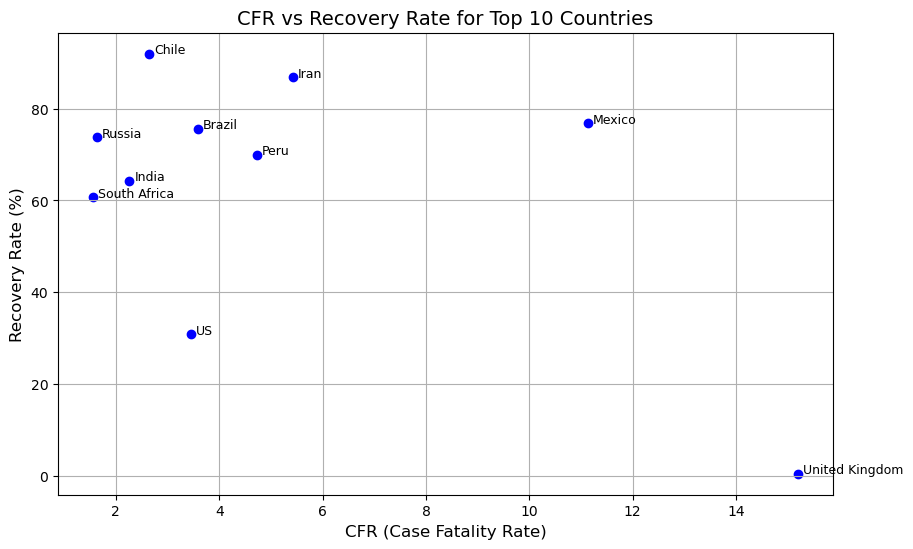

In [51]:
import matplotlib.pyplot as plt

# Data for top 10 countries (CFR and Recovery Rate)
countries = ['US', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico', 'Peru', 'Chile', 'United Kingdom', 'Iran']
cfr = [3.449932, 3.587410, 2.257186, 1.632708, 1.561668, 11.131030, 4.725993, 2.640527, 15.194824, 5.419508]
recovery_rate = [30.902656, 75.608414, 64.264803, 73.743572, 60.753013, 76.818824, 69.934594, 91.961152, 0.476288, 86.900131]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cfr, recovery_rate, color='blue')

# Add labels to the points
for i, country in enumerate(countries):
    plt.text(cfr[i] + 0.1, recovery_rate[i], country, fontsize=9)

# Title and labels
plt.title('CFR vs Recovery Rate for Top 10 Countries', fontsize=14)
plt.xlabel('CFR (Case Fatality Rate)', fontsize=12)
plt.ylabel('Recovery Rate (%)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()
